In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Mapeo con poses conocidas

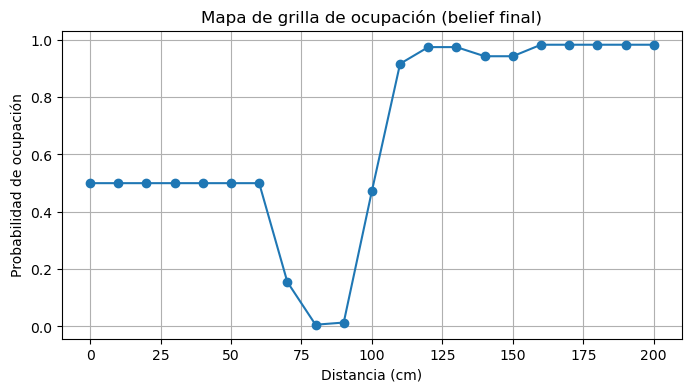

In [ ]:
# Parámetros
c = np.arange(0, 201, 10)       # coordenadas
p0 = 0.5                        # probabilidad a priori
measurements = [101, 82, 91, 112, 99, 151, 96, 85, 99, 105]

# Voy a usar log-odds
L = np.log(p0 / (1 - p0)) * np.ones_like(c, dtype=float)

# Modelo del sensor
def log_odds(p):
    return np.log(p / (1 - p))

for z in measurements:
    for i, ci in enumerate(c):
        if ci < z - 20:  # más de 20 cm antes de la medición --> sin cambio
            continue
        elif ci < z:     # antes de la medición
            p = 0.3
        else:            # más allá de la medición
            p = 0.6
        L[i] += log_odds(p) - log_odds(p0)

# Paso todo a probabilidades
m = 1 / (1 + np.exp(-L))

# Grafiquito
plt.figure(figsize=(8,4))
plt.plot(c, m, marker='o')
plt.title("Mapa de grilla de ocupación (belief final)")
plt.xlabel("Distancia (cm)")
plt.ylabel("Probabilidad de ocupación")
plt.grid(True)
plt.show()
